In [1]:
# %load common.py
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

def load_autos_dataset():
    auto = pd.read_csv('./data/Auto.csv', na_values='?', index_col='name')
    auto = auto.dropna()
    return auto

def load_boston_dataset():
    rdataset = sm.datasets.get_rdataset('Boston', 'MASS', True)
    return rdataset.data

def load_carseats_dataset():
    return pd.read_csv('./data/Carseats.csv', index_col=0)

%matplotlib inline

In [2]:
smarket = pd.read_csv('./data/Smarket.csv', index_col=0)

In [3]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
smarket.shape

(1250, 9)

In [5]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


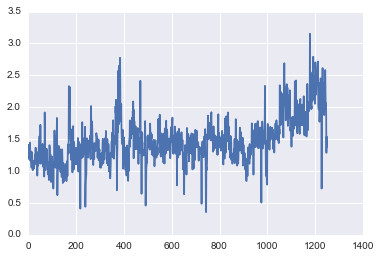

In [6]:
plt.plot(smarket.index, smarket['Volume'])

In [7]:
smarket['Direction_Up'] = smarket['Direction'].map(lambda x: 1 if x == 'Up' else 0)

In [8]:
predictor_columns = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
up_predictors = smarket[predictor_columns]

In [9]:
model = sm.Logit(smarket['Direction_Up'], 
                 sm.add_constant(up_predictors))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Oct 2016   Pseudo R-squ.:                0.002074
Time:                        17:38:08   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.050     -1.457      0.145        -0.171     0.025
Lag2          -0.0423      0.050     -0.845      0.398        -0.140     0.056
Lag3           0.0111      0.050      0.222      0.824        -0.087     0.109
Lag4           0.0094      0.050      0.187      0.851        -0.089     0.107
Lag5           0.0103      0.050      0.208      0.835        -0.087     0.107
Volume         0.1354      0.158      0.855      0.392        -0.175     0.446
==============================================================================
"""

In [11]:
smarket['sm_up_proba'] = result.predict(sm.add_constant(up_predictors))

In [12]:
smarket['sm_up_proba'][:10]

1     0.507084
2     0.481468
3     0.481139
4     0.515222
5     0.510781
6     0.506956
7     0.492651
8     0.509229
9     0.517614
10    0.488838
Name: sm_up_proba, dtype: float64

In [16]:
smarket['Prediction'] = smarket['sm_up_proba'].map(lambda x: 'Up' if x > 0.5 else 'Down')

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(smarket['Direction'], smarket['Prediction'], labels=['Up', 'Down'])

array([[507, 141],
       [457, 145]])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(up_predictors, smarket['Direction_Up'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
clf.coef_

array([[-0.07284382, -0.04223527,  0.0110161 ,  0.00928364,  0.01026345,
         0.13210837]])

In [22]:
clf.intercept_

array([-0.12107884])

In [27]:
clf.predict_proba(up_predictors)[:10]

array([[ 0.4926563 ,  0.5073437 ],
       [ 0.51825501,  0.48174499],
       [ 0.51870192,  0.48129808],
       [ 0.48465051,  0.51534949],
       [ 0.4890086 ,  0.5109914 ],
       [ 0.4929353 ,  0.5070647 ],
       [ 0.50725072,  0.49274928],
       [ 0.49072098,  0.50927902],
       [ 0.48216684,  0.51783316],
       [ 0.51090539,  0.48909461]])

In [26]:
clf.predict(up_predictors)[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [43]:
train = smarket.ix[smarket['Year'] < 2005]

In [46]:
train.shape

(998, 12)

In [47]:
test = smarket.ix[smarket['Year'] == 2005]

In [48]:
test.shape

(252, 12)

In [49]:
clf.fit(train[predictor_columns], train['Direction_Up'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
prediction = clf.predict(test[predictor_columns])

In [52]:
confusion_matrix(test['Direction_Up'], prediction, labels=[0,1])

array([[74, 37],
       [93, 48]])

In [53]:
sm_result = sm.Logit(train['Direction_Up'], sm.add_constant(train[predictor_columns])).fit()
sm_predicion = sm_result.predict(sm.add_constant(test[predictor_columns]))

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [65]:
prediction = np.zeros((252,))

In [67]:
prediction[sm_predicion > 0.5] = 1

In [68]:
confusion_matrix(test['Direction_Up'], prediction)

array([[77, 34],
       [97, 44]])

In [69]:
reduced_predictors = ['Lag1', 'Lag2']
sm_result = sm.Logit(train['Direction_Up'], sm.add_constant(train[reduced_predictors])).fit()
sm_prediction = sm_result.predict(sm.add_constant(test[reduced_predictors]))

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


In [70]:
prediction[:] = 0

In [73]:
prediction[sm_prediction > 0.5] = 1
confusion_matrix(test['Direction_Up'], prediction)

array([[ 35,  76],
       [ 35, 106]])

In [76]:
sm_result.predict(sm.add_constant(DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})))

array([ 0.47914624,  0.49609387])